In [ ]:
!pip -qq install bertopic

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 5.2 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 3.8 MB 37.1 MB/s 
     |████████████████████████████████| 1.2 MB 49.1 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 895 kB 57.6 MB/s 
     |████████████████████████████████| 6.5 MB 27.1 MB/s 
     |████████████████████████████████| 636 kB 58.9 MB/s 
     |████████████████████████████████| 1.1 MB 55.1 MB/s 


In [ ]:
import pandas as pd
from bertopic import BERTopic

In [78]:
tweets_df = pd.read_csv('cleaned_elderly_tweets.csv').iloc[:, 1:]
tweets_df

,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags
0,2022-02-24T21:33:19.000Z,3.240659e+09,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[]
1,2022-02-24T20:28:33.000Z,1.469170e+18,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']"
2,2022-02-24T20:25:13.000Z,3.355189e+09,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[]
3,2022-02-24T19:44:18.000Z,2.130565e+07,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[]
4,2022-02-24T18:53:50.000Z,5.038248e+07,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']"
...,...,...,...,...,...,...,...,...
57134,2018-01-01T14:36:44.000Z,7.775120e+17,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[]
57135,2018-01-01T06:29:56.000Z,3.164684e+09,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[]
57136,2018-01-01T05:29:42.000Z,2.846543e+07,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[]
57137,2018-01-01T03:08:09.000Z,2.616188e+07,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[]


In [ ]:
# Instanciating BERTopic
topic_model = BERTopic(language = "english", calculate_probabilities = True, verbose = True)

In [ ]:
# Fitting
topics, probs = topic_model.fit_transform(tweets_df['cleaned_text'])

Batches:   0%|          | 0/1786 [00:00<?, ?it/s]

2022-03-18 10:54:11,777 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-03-18 10:55:54,288 - BERTopic - Reduced dimensionality with UMAP
2022-03-18 11:13:55,624 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
topic_model.save("BERTopic_elderly_tweets_model")

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [3]:
topic_model = BERTopic.load("BERTopic_elderly_tweets_model")

In [86]:
tweets_df = pd.read_csv('topics_elderly_tweets.csv').iloc[:, 1:]
tweets_df.head()

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,topic,topics
0,1496961461465542656,2022-02-24T21:33:19.000Z,3240659214,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],-1,NaN
1,1496945165365219333,2022-02-24T20:28:33.000Z,1469167464101515267,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",-1,NaN
2,1496944326416510984,2022-02-24T20:25:13.000Z,3355188729,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],266,NaN
3,1496934029542793224,2022-02-24T19:44:18.000Z,21305650,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],10,covid
4,1496921328103804935,2022-02-24T18:53:50.000Z,50382485,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",470,"health, house, social activity, environment"


In [4]:
topic_model.get_topic_info().head(20)

,Topic,Count,Name
0,-1,30633,-1_and_to_the_of
1,0,1032,0_mens_senior_championship_team
2,1,655,1_citizen_senior_seniors_citizens
3,2,405,2_housing_affordable_rental_units
4,3,388,3_pharmacare_drugs_prescriptions_drug
5,4,350,4_dog_cat_cats_dogs
6,5,344,5_trudeau_trudeaus_justin_harper
7,6,325,6_christmas_stockingstuffersforseniors_gifts_s...
8,7,303,7_music_album_songs_song
9,8,301,8_abuse_awareness_elder_elderabuse


In [ ]:
print(f"Topics discovered: {max(topic_model.get_topic_info()['Topic']) +1}")

Topics discovered: 479


In [ ]:
tweets_df['topic'] = topics
tweets_df.head()

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,topic
0,1496961461465542656,2022-02-24T21:33:19.000Z,3240659214,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],-1
1,1496945165365219333,2022-02-24T20:28:33.000Z,1469167464101515267,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",-1
2,1496944326416510984,2022-02-24T20:25:13.000Z,3355188729,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],266
3,1496934029542793224,2022-02-24T19:44:18.000Z,21305650,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],10
4,1496921328103804935,2022-02-24T18:53:50.000Z,50382485,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",470


In [ ]:
tweets_df.to_csv('topic_elderly_tweets.csv')

In [ ]:
topic_model.visualize_barchart(top_n_topics=16)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.get_topic(2)

[('housing', 0.036615913984845046),
 ('affordable', 0.017598242133244138),
 ('rental', 0.008987034854836099),
 ('units', 0.007708666761788498),
 ('rent', 0.007197650878213593),
 ('building', 0.005705816171964855),
 ('homes', 0.0051847581886425124),
 ('housingcrisis', 0.004885411453140319),
 ('development', 0.004666221284084801),
 ('estate', 0.004621933453047036)]

In [ ]:
covid_topics, covid_topics_similarity = topic_model.find_topics("covid", top_n=8)
covid_topics, covid_topics_similarity

([21, 118, 50, 22, 114, 136, 82, 47],
 [0.9083400670230628,
  0.8445640406672332,
  0.7401282978568541,
  0.6989364014970111,
  0.6394763813967514,
  0.604368453121056,
  0.5838579132573016,
  0.5815904696287055])

In [ ]:
health_topics, health_topics_similarity = topic_model.find_topics("health", top_n=4)
health_topics, health_topics_similarity

([314, 138, 39, 81],
 [0.7089353535887709,
  0.6642409524373744,
  0.6383483365227587,
  0.5957046471011027])

In [ ]:
house_topics, house_topics_similarity = topic_model.find_topics("house", top_n=6)
house_topics, house_topics_similarity
# Don't use: 121 = homecare

([2, 196, 248, 195, 121, 313],
 [0.7482381500971178,
  0.7210846245339032,
  0.6852468667230251,
  0.6361652356665669,
  0.626149482565182,
  0.6227906044013405])

In [ ]:
homecare_topics, homecare_topics_similarity = topic_model.find_topics("homecare", top_n=3)
homecare_topics, homecare_topics_similarity

([282, 121, 238], [0.5874792395049573, 0.5783637810212912, 0.5748217653909435])

In [ ]:
money_topics, money_topics_similarity = topic_model.find_topics("money", top_n=3)
money_topics, money_topics_similarity

([24, 108, 192], [0.7361000716045887, 0.6796590935302966, 0.6605647145303952])

In [ ]:
charity_topics, charity_topics_similarity = topic_model.find_topics("charity", top_n=3)
charity_topics, charity_topics_similarity

([192, 188, 382], [0.8092890567399649, 0.716952957680453, 0.6262113059698777])

In [ ]:
safety_topics, safety_topics_similarity = topic_model.find_topics("safety", top_n=3)
safety_topics, safety_topics_similarity

([26, 161, 80], [0.6170858311403726, 0.5632132117808165, 0.5412879399408599])

In [ ]:
activity_topics, activity_topics_similarity = topic_model.find_topics("activity", top_n=10)
activity_topics, activity_topics_similarity

([81, 135, 470, 358, 228, 78, 402, 282, 122, 34],
 [0.7553598894694056,
  0.6868583957001935,
  0.6084892016748857,
  0.5811010879392426,
  0.5653629375369117,
  0.5634377935133735,
  0.5608845191573497,
  0.5574621508983298,
  0.5538162204820811,
  0.5479144071656259])

In [ ]:
first_nations_topics, first_nations_topics_similarity = topic_model.find_topics("first nations", top_n=8)
first_nations_topics, first_nations_topics_similarity

([159, 19, 474, 111, 85, 151, 180, 257],
 [0.5398095471156801,
  0.5333436896848136,
  0.47884711112350625,
  0.4633025746315597,
  0.4630300057959256,
  0.4542429651546084,
  0.4531921182306844,
  0.44905120255990516])

In [ ]:
first_nations_topics, first_nations_topics_similarity = topic_model.find_topics("inter generation", top_n=8)
first_nations_topics, first_nations_topics_similarity

In [ ]:
topic_model.get_topic(34)

[('sidewalks', 0.05355376806557004),
 ('sidewalk', 0.020541469303844356),
 ('snow', 0.017440425927141266),
 ('clear', 0.014654922556872037),
 ('clearing', 0.012729678657681324),
 ('strollers', 0.01219580703282236),
 ('mobility', 0.012188679197542822),
 ('walk', 0.011749023999617086),
 ('cleared', 0.010924180363210328),
 ('roads', 0.010147750656756386)]

In [70]:
categories = ['covid', 'health', 'house', 'homecare', 'money', 'volunteer',
              'safety', 'abuse', 'physical activity', 'social activity',
              'first nations', 'schooling', 'environment', 'autonomy',
              'freedom', 'climate', 'temperature', 'vaccine', 'grocery']

similarity_cutoff = 0.50
top_n = 20

my_topics = {}
for category in categories:
  # Initiate category list
  my_topics[str(category)] = []

  # Get topics and similarities for given category
  topics, similarities = topic_model.find_topics(category, top_n = top_n)

  # Populate my_topics dict
  for topic, similarity in zip(topics, similarities):
    if similarity >= similarity_cutoff:
      my_topics[str(category)].append(topic)

In [76]:
topic_model.get_topic(22)

[('deaths', 0.02043223822282632),
 ('covid19', 0.01392840821932564),
 ('canada', 0.011295904383311966),
 ('died', 0.01125245236191934),
 ('cases', 0.010366689232745164),
 ('quebec', 0.009290500866128726),
 ('covid', 0.006958105689878216),
 ('virus', 0.0067414900693707905),
 ('canadians', 0.006641515955387212),
 ('die', 0.006565985586314442)]

In [72]:
my_topics['health'].append(3)
my_topics['social activity'].append(6)
my_topics['social activity'].append(7)
my_topics['house'].append(12)
my_topics['health'].remove(470)
my_topics['house'].remove(470)

In [73]:
for key, value in zip(my_topics.keys(), my_topics.values()):
  print(key, value)

covid [21, 118, 50, 22, 114, 136, 82, 47, 437, 33, 302, 222, 275, 25, 90, 327, 10]
health [314, 138, 39, 81, 316, 77, 33, 296, 101, 300, 360, 401, 121, 112, 327, 114, 73, 224, 273, 3]
house [2, 196, 248, 195, 121, 313, 380, 362, 326, 413, 439, 238, 64, 395, 117, 312, 435, 454, 285, 12]
homecare [282, 121, 238, 248, 2, 194]
money [24, 108, 192, 339, 39, 145, 27, 351, 123, 196, 219, 360, 112, 84, 42, 413, 235, 165, 281, 261]
volunteer [382, 188, 192, 120, 433, 123, 282, 52, 194, 121, 140, 456, 171, 225]
safety [26, 161, 80, 174]
abuse [8, 321, 375, 459, 436, 296, 472, 346, 193, 11, 368, 345, 205, 410, 312, 210, 316, 142, 126, 26]
physical activity [81, 402, 135, 181, 227]
social activity [35, 83, 233, 221, 81, 433, 135, 470, 282, 6, 7]
first nations [159, 19]
schooling [261, 59, 248]
environment [94, 248, 405, 2, 279, 362, 196, 221, 249, 135, 384, 386, 446, 338, 454, 233, 470]
autonomy [282, 233, 213]
freedom [204, 180, 472, 237, 225, 26, 112, 221, 174, 219, 416, 296, 166, 189, 8, 386, 9

In [80]:
topic_model.get_topics()

{-1: [('and', 0.0020644614801842423),
  ('to', 0.0020555814343625792),
  ('the', 0.0020215779241305044),
  ('of', 0.0020053203721113366),
  ('in', 0.001993851966806238),
  ('for', 0.0019878073979784448),
  ('with', 0.0019527547561532014),
  ('our', 0.0019391582874912368),
  ('this', 0.0019272127566831354),
  ('we', 0.0018936983650581969)],
 0: [('mens', 0.023937827581410914),
  ('senior', 0.015608541104755623),
  ('championship', 0.014721347833101715),
  ('team', 0.014241604429822674),
  ('game', 0.01414869420661966),
  ('womens', 0.013666780149366241),
  ('season', 0.011492093301248613),
  ('golf', 0.009496867076683598),
  ('rugby', 0.009097293690204034),
  ('basketball', 0.008919037580188837)],
 1: [('citizen', 0.010720188968359214),
  ('senior', 0.008400203763148647),
  ('seniors', 0.007163771974098935),
  ('citizens', 0.004347678021194717),
  ('too', 0.004309394953975821),
  ('what', 0.004302105987945584),
  ('dont', 0.0042634516416756385),
  ('nothing', 0.004232310565085769),
  ('

In [87]:
# Assigning topics
for i, topic in enumerate(tweets_df['topic']):
  tweets_df.loc[i, 'topics'] = ''
  temp_topics = []
  for key, value in zip(my_topics.keys(), my_topics.values()):
    if topic in value:
      temp_topics.append(key)
    tweets_df.loc[i, 'topics'] = ', '.join(temp_topics)

In [88]:
tweets_df

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,topic,topics
0,1496961461465542656,2022-02-24T21:33:19.000Z,3240659214,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],-1,
1,1496945165365219333,2022-02-24T20:28:33.000Z,1469167464101515267,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",-1,
2,1496944326416510984,2022-02-24T20:25:13.000Z,3355188729,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],266,
3,1496934029542793224,2022-02-24T19:44:18.000Z,21305650,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],10,"covid, vaccine"
4,1496921328103804935,2022-02-24T18:53:50.000Z,50382485,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",470,"social activity, environment"
...,...,...,...,...,...,...,...,...,...,...,...
57134,947839007450308608,2018-01-01T14:36:44.000Z,777511588701937665,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[],-1,
57135,947716501452177408,2018-01-01T06:29:56.000Z,3164684096,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[],-1,
57136,947701343443091456,2018-01-01T05:29:42.000Z,28465428,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[],38,
57137,947665721349279745,2018-01-01T03:08:09.000Z,26161882,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[],160,


In [89]:
tweets_df.to_csv('topics_elderly_tweets.csv')

In [90]:
!pip -qq install wordcloud

<function matplotlib.pyplot.show>

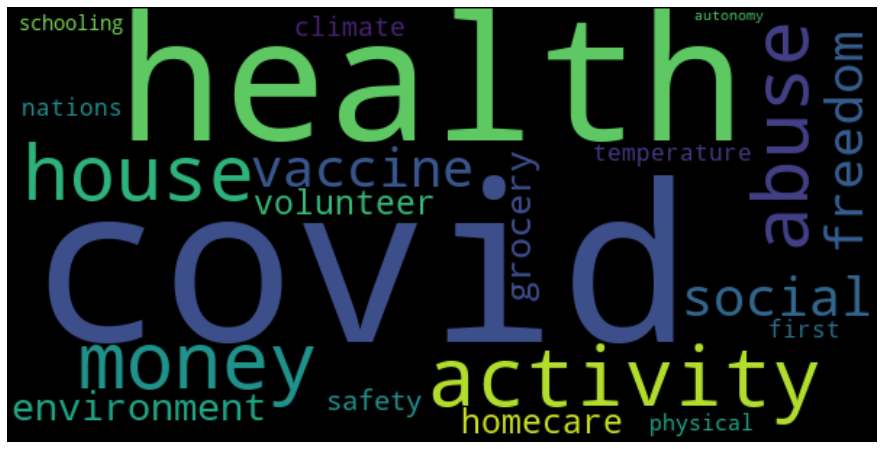

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = 'black',
               collocations = False,
               width = 600,
               height = 300).generate(', '.join(tweets_df['topics'].tolist()))

plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show